In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,Sequential
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,MaxPool2D,Activation,BatchNormalization,Dense
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [52]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.1,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    fill_mode = "nearest",
    validation_split = 0.2
)


In [53]:
val_datagen = ImageDataGenerator(rescale=1./255, validation_split =  0.2)

In [78]:
# features_test = train_datagen.reshape(..., 28, 28, 1)      
train_generator = train_datagen.flow_from_directory(
    'mnist/train',
    target_size = (28,28),
    batch_size = 32,
    classes = ['0', '1', '2'],
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'training') # set as training data

validation_generator = val_datagen.flow_from_directory(
    'mnist/val', # same directory as training data
    target_size = (28, 28),
    batch_size=32,
    classes = ['0', '1', '2'],
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'validation') 



Found 192 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [55]:
print("[INFO]- Training Set")
print("Number of samples in train set: ", train_generator.samples)
print("Number of classes in test set: ", len(train_generator.class_indices))
print("Number of samples per class[train-set]: ", int(train_generator.samples / len(train_generator.class_indices)))
print("****************************************")

print("\n[INFO]- Validation Set")
print("Number of samples in validation set: ", validation_generator.samples)
print("Number of classes in validation set: ", len(validation_generator.class_indices))
print("Number of samples per class[validation-set]: ", int(validation_generator.samples / len(validation_generator.class_indices)))
print("****************************************")  


[INFO]- Training Set
Number of samples in train set:  192
Number of classes in test set:  3
Number of samples per class[train-set]:  64
****************************************

[INFO]- Validation Set
Number of samples in validation set:  12
Number of classes in validation set:  3
Number of samples per class[validation-set]:  4
****************************************


In [56]:
from warnings import filters


input_shape = (28,28,1)
n_classes = 3

model = models.Sequential([
    keras.layers.Conv2D(32,(3,3),padding ='same',input_shape=(28,28,1)),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(32,(3,3), activation='relu',padding ='same',input_shape=(28,28,1)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(  pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,(3,3), activation='relu',padding ='same',input_shape=(28,28,1)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(  pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes),
    keras.layers.Activation('softmax')
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                      

In [57]:
from sklearn import metrics


model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])

In [240]:
H = model.fit(
    
    train_generator, ## Numbers of training sample uing for training
    steps_per_epoch = len(train_generator),#
    validation_data = validation_generator,
    validation_steps = len(validation_generator),
    epochs = 10
)


Epoch 1/10
6/6 [==============================] - 1s 216ms/step - loss: 0.1124 - accuracy: 0.9688 - val_loss: 0.6049 - val_accuracy: 0.6667
Epoch 2/10
6/6 [==============================] - 1s 159ms/step - loss: 0.1200 - accuracy: 0.9688 - val_loss: 0.5869 - val_accuracy: 0.7500
Epoch 3/10
6/6 [==============================] - 1s 164ms/step - loss: 0.0674 - accuracy: 0.9792 - val_loss: 0.5819 - val_accuracy: 0.7500
Epoch 4/10
6/6 [==============================] - 1s 143ms/step - loss: 0.1096 - accuracy: 0.9688 - val_loss: 0.5722 - val_accuracy: 0.7500
Epoch 5/10
6/6 [==============================] - 1s 143ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.5503 - val_accuracy: 0.7500
Epoch 6/10
6/6 [==============================] - 1s 145ms/step - loss: 0.0687 - accuracy: 0.9740 - val_loss: 0.5274 - val_accuracy: 0.7500
Epoch 7/10
6/6 [==============================] - 1s 142ms/step - loss: 0.0723 - accuracy: 0.9844 - val_loss: 0.5008 - val_accuracy: 0.7500
Epoch 8/10
6/6 [====

## Solution 3:
#### train_generator:Total number of samples for used for Training.
#### steps_per_epoch = len(train_generator):It is used to define how many batches of samples is used  in one epoch for training.which is equal to training samples / batch size , 192/32 = 6, for each epoch 6 batches will be used for training, which each batch consist of 32 images total number images will be  = 6*32

###  validation_data = The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters
   
### validation_steps = len(validation_generator):validation_generator: Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.

### epochs = 10 : 1 epoch consist of 6 batches , which is equal to 6 * 32 = 192, for each epoch 192 times images are used for training , for 10 epochs 10*192 = 1920 times images are trained

In [248]:
print(len(train_generator)) 
#it is equal to  total number of train samples dividev by the batch size
print(f'total number of training samples/batch size  = {192/32}')

print(6*32)


6
total number of training samples/batch size  = 6.0
192


6.0

In [59]:
scores = model.evaluate(train_generator, steps=len(train_generator), verbose=1)

6/6 [==============================] - 0s 35ms/step - loss: 0.6547 - accuracy: 0.8646


In [60]:
print("Train Accuracy: %.2f%%" % (scores[1]*100))

# Validation accuracy
scores = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print("Validation (Seen) Accuracy: %.2f%%" % (scores[1]*100))


Train Accuracy: 86.46%
1/1 [==============================] - 0s 58ms/step - loss: 0.6181 - accuracy: 0.7500
Validation (Seen) Accuracy: 75.00%


## Solutions 1


# Saving entire model

In [61]:

model.save('model.h5')
# To load the saved model, use the following code:
from tensorflow.keras.models import load_model
loaded_model = load_model('model.h5')
loaded_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                      

## saving architecture and weights Only

In [62]:
import json
saving_weights = model.save_weights('weights.h5')

model_architecture = model.to_json()
with open('model_architecture.json', 'w') as outfile:
    json.dump(model_architecture, outfile)


### saving modle 

In [63]:
model.save('model_v1.h5')

In [64]:
saved_model = keras.models.load_model('model_v1.h5')

In [65]:
#saved_models.predict()
validation_generator.dtype

'float32'

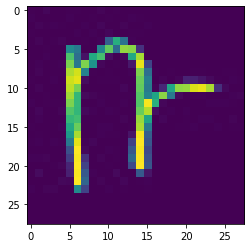

In [66]:

import matplotlib.pyplot as plt

plt.imshow(validation_generator[0][0][0])


In [67]:
# will show the labels names
validation_generator.class_indices



{'0': 0, '1': 1, '2': 2}

In [71]:
import numpy as np 
from keras.preprocessing import image

## Saved model prediction using unseen data


In [106]:
test = ImageDataGenerator(
    rescale = 1/255
)

In [176]:
testdata = test.flow_from_directory('testimg',target_size = (28,28),
    batch_size = 32,
    classes = ['0', '1', '2'],
    class_mode = 'categorical',
    color_mode = 'grayscale',)

Found 11 images belonging to 3 classes.


In [239]:
# dict



total_pred = []


# labels of the test images


import numpy as np
pred = saved_model.predict(testdata)
for prediction in pred:
    total_pred.append(prediction.max())
print(f'prediction for 11 test images are: {total_pred})')

## apped Prediction for the respective classes

print(f'prediction for first labels 0: {total_pred[:4]}\n prediction for second labels 1 : {total_pred[4:7]}\n prediction for third labels 3: {total_pred[6:]}')

prediction for 11 test images are: [0.8516847, 0.75905675, 0.8844409, 0.47941357, 0.44191352, 0.85305744, 0.7982568, 0.37979138, 0.8138467, 0.94920987, 0.91506237])
prediction for first labels 0: [0.8516847, 0.75905675, 0.8844409, 0.47941357]
 prediction for second labels 1 : [0.44191352, 0.85305744, 0.7982568]
 prediction for third labels 3: [0.7982568, 0.37979138, 0.8138467, 0.94920987, 0.91506237]
